# Predicting Car Prices

### We will utilise K-Nearest Neighbours (KNN) to build an algorithm that can help us predict the market price of a car given a set of attributes about a car.

More info about the data set can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile). Direct download link for the data can be found here: [download](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). Here's a preview of the data set:

---

### 1. Data Loading:
Let's start by reading in the data and getting an understanding of it.

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99 # prevent the columns being truncated 

cars = pd.read_csv(r'C:\Users\Panda\Documents\4 Coding & Work\1 DataQuest Files\Working Files\imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [2]:
# let's fix the column names
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv(r'C:\Users\Panda\Documents\4 Coding & Work\1 DataQuest Files\Working Files\imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
print(cars.shape)
print(cars.dtypes)

(205, 26)
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


Looks like we only have 206 rows of data, and this dataset is old. To have a real-world applicable version of this algorithm, we will need to adapt it and apply it to a much larger dataset. In any case, let's make a start here...

--- 

### 2. Data Cleaning:

Let's look to clean the data. We'll start by selecting only the relevant columns.

For the purposes of this study using a KNN algorithm, we'll only focus on columns with continuous values. Hence, even if they may be useful, we will dropping the following columns:

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. make: {alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo}
3. fuel-type: diesel, gas.
4. aspiration: std, turbo.
5. num-of-doors: four, two.
6. body-style: hardtop, wagon, sedan, hatchback, convertible.
7. drive-wheels: 4wd, fwd, rwd.
8. engine-location: front, rear.
9. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
10. num-of-cylinders: eight, five, four, six, three, twelve, two.
11. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.

In [4]:
# let's select only the columns with continuous values 
relevant_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 
                 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = cars[relevant_cols].copy()

# the 'price' column is our target column here
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


---

Let's begin cleaning these columns. We'll start by replacing any '?' with N/A's.

In [5]:
cars.replace('?', np.nan, inplace=True)
cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

---

Now since we selected only the continuous data columns, let's simply convert all these columns to float.

In [6]:
cars = cars.astype('float')
cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

---

Taking a look at the N/A's above, we'll first remove the <u>price</u> column N/A's, since that's the column we need to predict.

In [7]:
cars.dropna(subset=['price'], inplace=True)
cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

---

For the remaining N/A values above, for now let's simply input the mean of those columns. 

This will have the greatest impact on the <u>normalized-losses</u> column, so we'll need to keep an eye on that one (37 out of 201 remaining columns is a significant amount, so later on we may choose to re-think our strategy with this column).

In [8]:
cars = cars.fillna(cars.mean())
cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
cars.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


---

Let's now normalize all data columns to values between 0 and 1.

In [10]:
temporary_price_col = cars['price']
cars = (cars - cars.min()) / (cars.max() - cars.min())
cars['price'] = temporary_price_col
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


---

### 3. Model Building

Great! We now have a clean dataset. Let's start with some simple KNN models before moving on to the more complex ones.

First, let's build our function to train and test the model. We'll be using Root Mean Square Error (RMSE) as our error metric.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    
    # randomize order of rows in data frame
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # split the data 50/50 for train & test
    train_df = rand_df.iloc[0:round(rand_df.shape[0]*0.5)]
    test_df = rand_df.iloc[round(rand_df.shape[0]*0.5):]
    
    train_features = train_df[train_col]
    train_target = train_df[target_col]
    knn.fit(train_features, train_target)
    
    predictions = knn.predict(test_df[train_col])
    
    rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    
    return rmse

---

## 3. a) Univariate Model, k = 5

In [12]:
# let's now test this model for each individual the data column
rmses = {}
train_cols = cars.columns[:-1]

for train_col in train_cols:
    rmse = knn_train_test([train_col], 'price', cars)
    rmses[train_col] = rmse

rmses = sorted(rmses.items(), key=lambda x: x[1])
rmses

[('engine-size', 3238.4628296477176),
 ('horsepower', 4037.0377131537603),
 ('curb-weight', 4401.118254793124),
 ('highway-mpg', 4630.026798588056),
 ('width', 4704.482589704386),
 ('city-mpg', 4766.422505090134),
 ('length', 5427.2009608367125),
 ('wheel-base', 5461.553997873057),
 ('compression-rate', 6610.812153159129),
 ('bore', 6780.627784685976),
 ('normalized-losses', 7330.197653434445),
 ('peak-rpm', 7697.4596964334805),
 ('stroke', 8006.529544647101),
 ('height', 8144.441042663747)]

**3. a) Univariate Model, k = 5 | Observations:**

Looks like 'engine-size' is the best predictor when running univariate KNN with the default  k value (k = 5) against each column individually.

---

## 3. b) Univariate Model, range of k values 1-9:

Let's now re-run the univariate KNN model but with a range of k values.

In [13]:
def knn_train_test(train_col, target_col, df, k_values): # adjust the function to account for k-value
    
    # randomize order of rows in data frame
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # split the data 50/50 for train & test
    train_df = rand_df.iloc[0:round(rand_df.shape[0]*0.5)]
    test_df = rand_df.iloc[round(rand_df.shape[0]*0.5):]
    
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        train_features = train_df[train_col]
        train_target = train_df[target_col]
        knn.fit(train_features, train_target)
        
        predictions = knn.predict(test_df[train_col])

        rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
        
        k_rmses[k] = rmse
    
    return k_rmses

# let's now test this model for all the data columns for the range of k values

k_rmses_output = {}
k_values = [1,3,5,7,9]

for train_col in train_cols:
    k_rmse_val = knn_train_test([train_col], 'price', cars, k_values)
    k_rmses_output[train_col] = k_rmse_val

k_rmses_output

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


Let's visualise these results above to try better make sense of them:

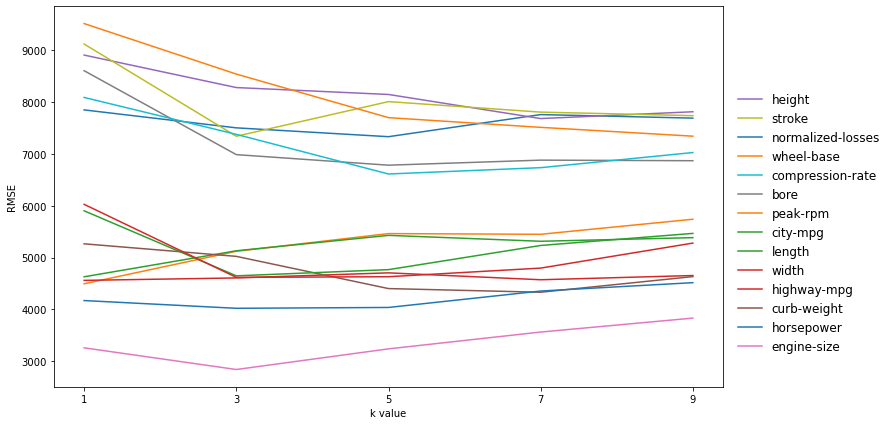

Of all points, the minimum RMSE value is 2840.6


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

k_rmses_series = pd.Series(k_rmses_output)

plt.figure(figsize=(12,7))
min_rmses = []

for i, j in zip(k_rmses_series, range(0, len(k_rmses_series))):
    plot_values = (pd.Series(i)).sort_index()
    x = plot_values.index
    y = plot_values
    min_rmses.append(round(np.min(y),1))
    
    plt.plot(x,y,label=k_rmses_series.index[j])
plt.xlabel('k value')
plt.xticks([1,3,5,7,9])
plt.ylabel('RMSE')

handles, labels = plt.gca().get_legend_handles_labels()                     # to order the legend output
order=[4, 8, 0, 1, 9, 7, 11, 12, 2, 3, 13, 5, 10, 6]                        # to order the legend output
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],  # to order the legend output
           frameon=False, bbox_to_anchor=(1.25, 0.8), fontsize=12)

plt.show()
print("Of all points, the minimum RMSE value is {}".format(np.min(min_rmses)))

**3. b) Univariate Model, range of k values 1-9 | Observations:**

So <u>engine-size</u> is once again the best predictor when running univariate KNN this time across the range of k values, particularly at k=3.

<u>horsepower</u> is also a decent predictor, especially at the lower k-values.

---

## 3. c) Multivariate Model, k = 5

Let's now run a multivariate KNN model but with just the default k value (k = 5).

This time, our aim is to find the best features if selecting just 2, then 3, then 4, then 5 features.

In [15]:
# let's first remind ourselves of the 5 best features, in order, with k=5
best_features_k5 = rmses[0:5]
best_features_k5

[('engine-size', 3238.4628296477176),
 ('horsepower', 4037.0377131537603),
 ('curb-weight', 4401.118254793124),
 ('highway-mpg', 4630.026798588056),
 ('width', 4704.482589704386)]

Using the above list of top 5 features, let's train, test and check the RMSE if using the X number of best features (X from 2 to 5).

In [16]:
best_columns_k5 = [x[0] for x in best_features_k5]
best_columns_rmses = {}
k_values = [5]

for i in range(2,6):
    rmse = knn_train_test(best_columns_k5[0:i], 'price', cars, k_values)
    best_columns_rmses["Using the {} best features".format(i)] = rmse

best_columns_rmses

{'Using the 2 best features': {5: 2949.8817277180374},
 'Using the 3 best features': {5: 3435.2601095401815},
 'Using the 4 best features': {5: 3286.5597353252815},
 'Using the 5 best features': {5: 3410.2170133901805}}

**3. c) Multivariate Model, k = 5 | Observations:**

The three best options here which provide the lowest root mean square errors are either to use 2, 4, or 5 features, with 2 features being the best by some margin.

---

## 3. d) Multivariate Model, range of k values 1-25

For the final stage of this exercise, let's now take these three best combinations and range the k values from 1-25, and plot on a line graph to see which combination of features and k value provides the best outcome.

In [17]:
best_columns_rmses_krange = {}
k_values = list(range(1, 26))
for i in [2, 4, 5]:
    rmse = knn_train_test(best_columns_k5[0:i], 'price', cars, k_values)
    best_columns_rmses_krange["With these features {}".format(best_columns_k5[0:i])] = rmse

best_columns_rmses_krange

{"With these features ['engine-size', 'horsepower']": {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 "With these features ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']": {1: 2927.820116343107,
  2: 2600.431466008274,
  3: 2799.0983199667144,
  4: 3074.9999988931822,
  5: 3286.5597353252815,
  6: 3705.1702717384333,
  7: 3822.180444798032,
  8: 3986.7014080509525,
  9: 4210.340136384571,
  10: 4213.31545786

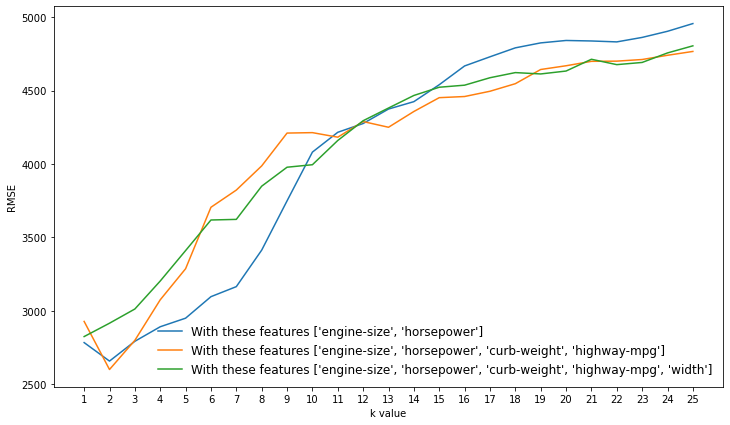

Of all points, the minimum RMSE value is 2600.4


In [18]:
# let's visualise these results to try better make sense of them
import matplotlib.pyplot as plt
%matplotlib inline

k_rmses_series = pd.Series(best_columns_rmses_krange)

plt.figure(figsize=(12,7))
min_rmses = []

for i, j in zip(k_rmses_series, range(0, len(k_rmses_series))):
    x = (pd.Series(i)).sort_index().index
    y = (pd.Series(i)).sort_index()
    min_rmses.append(round(np.min(y),1))
    
    plt.plot(x,y,label=k_rmses_series.index[j])
plt.xlabel('k value')
plt.xticks(list(range(1, 26)))
plt.ylabel('RMSE')
plt.legend(frameon=False, loc='lower right', fontsize=12)
plt.show()
print("Of all points, the minimum RMSE value is {}".format(np.min(min_rmses)))

**3. d) Multivariate Model, range of k values 1-25 | Observations:**

- Firstly, it is clear that the lower the value of k the better, in general.
- For both the 2 and 3 best feature model, a k value of k=2 is best.
- For the 4 feature model, k=1 is actually best.
- Of all combinations, the minimum RMSE is 2600.4, found using 4 features with a k = 2.

---

## 4. Overall Conclusions:

Let's recap the ideal configurations, for each of the 4 variations of KNN predictor model for used car prices:

**Univariate models:**

1. *Default k=5:* column <u>engine-size</u> (**RMSE=3238.5**).
2. *Optimal k=3:* column <u>engine-size</u> (**RMSE=2840.6**).

**Multivariate models:**

3. *Default k=5:* 2 columns <u>engine-size</u> and <u>horsepower</u> (**RMSE=2949.9**).
4. *Optimal k=2:* 4 columns <u>engine-size</u>, <u>horsepower</u>, <u>curb-weight</u>, and <u>highway-mpg</u> <font color='green'>(**RMSE=2600.4**)</font>.

The 4th model built has the lowest RMSE (of 2600.4); in fact we managed to bring it down almost 20% from the 1st RMSE. This model utilises 4 columns, with a k nearest neighbours value of 2. 

Given the small dataset size, we would need to be aware of overfitting if we were to port this model to a larger dataset.

---

**Takeaway points and next steps:**
- It looks like the <u>normalized-losses</u> column had one of the highest RMSEs. Could be worth just checking that this is not related filling in those N/A's with the column mean.
- More importantly, there are plenty of other columns that were dropped which (based on industry knowledge) would be very useful as predictor features. Those were all categorical columns, and so it would be the case of extrapolating those to dummy columns and analysing with those columns (where binary classification models are better suited).